# Playground Series - Season 4, Episode 11: Exploring Mental Health Data

![Playground Series - Season 4, Episode 11: Exploring Mental Health Data](images/s4e11.png)

Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Depression Survey/Dataset](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis) dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

This dataset was collected as part of a comprehensive survey aimed at understanding the factors contributing to depression risk among adults. It was collected during an anonymous survey conducted between January and June 2023. The survey was conducted across various cities, targeting individuals from diverse backgrounds and professions. Participants, ranging from 18 to 60 years old, voluntarily provided inputs on factors such as age, gender, city, degree, job satisfaction, study satisfaction, study/work hours, and family history among others. Participants were asked to provide inputs without requiring any professional mental health assessments or diagnostic test scores.

The target variable, 'Depression', represents whether the individual is at risk of depression, marked as 'Yes' or 'No', based on their responses to lifestyle and demographic factors. The dataset has been curated to provide insights into how everyday factors might correlate with mental health risks, making it a useful resource for machine learning models aimed at mental health prediction.

This dataset can be used for predictive modeling in mental health research, particularly in identifying key contributors to mental health challenges in a non-clinical setting.

Evaluation 

The evaluation metric for this competition is Accuracy Score.


##  Exploratory Data Analysis (EDA) 🔍

### Import Libraries 📚

In [58]:
import os
import kaggle_config
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Applying a custom color scheme to the plots
import urllib.request
url = "https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle"
if not os.path.exists("/Users/danipopov/Projects/Kaggle_PlayGround/rose-pine-dawn.mplstyle"):
    save_path = "/Users/danipopov/Projects/Kaggle_PlayGround/rose-pine-dawn.mplstyle"  # Include the file name
    urllib.request.urlretrieve(url, save_path)
    plt.style.use(save_path)

### Load Data 🔄

In [5]:
# Set Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config.KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = kaggle_config.KAGGLE_KEY


# Download the data from Kaggle
playground_series = 's4e11'
base_path = "/Users/danipopov/Projects/Kaggle_PlayGround"
kaggle_data_path = f"{base_path}/{playground_series}.zip"
data_path = f"{base_path}/data/{playground_series}"

# Create directory if it doesn't exist
! mkdir -p {data_path}

# Download, making sure we're in the correct directory
! kaggle competitions download -c playground-series-s4e11 

# Unzip the data
! unzip -q playground-series-s4e11.zip 

# Remove the zip file
! rm playground-series-s4e11.zip 

# Move the data to the data directory
! mv train.csv test.csv sample_submission.csv {data_path}

/Users/danipopov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
 88%|█████████████████████████████████▍    | 4.00M/4.55M [00:01<00:00, 5.15MB/s]
100%|██████████████████████████████████████| 4.55M/4.55M [00:01<00:00, 4.17MB/s]


### Exploring the csv files 📁

In [68]:
# Load the data
train_df = pd.read_csv(f"{data_path}/train.csv").drop(columns=['id'])
test_df = pd.read_csv(f"{data_path}/test.csv").drop(columns=['id'])
sample_submission_df = pd.read_csv(f"{data_path}/sample_submission.csv")

In [69]:
train_df.shape, test_df.shape, sample_submission_df.shape


((140700, 19), (93800, 18), (93800, 2))

We discover that:
- train_df has 19 columns and 140700 rows
- test_df has 18 columns and 93800 rows
- sample_submission_df has 2 columns and 93800 rows
- we removed the id column as it is not a feature

Let's look at the first 5 rows of the train_df:

In [13]:
train_df.head().T

,0,1,2,3,4
id,0,1,2,3,4
Name,Aaradhya,Vivan,Yuvraj,Yuvraj,Rhea
Gender,Female,Male,Male,Male,Female
Age,49.0,26.0,33.0,22.0,30.0
City,Ludhiana,Varanasi,Visakhapatnam,Mumbai,Kanpur
Working Professional or Student,Working Professional,Working Professional,Student,Working Professional,Working Professional
Profession,Chef,Teacher,NaN,Teacher,Business Analyst
Academic Pressure,NaN,NaN,5.0,NaN,NaN
Work Pressure,5.0,4.0,NaN,5.0,1.0
CGPA,NaN,NaN,8.97,NaN,NaN


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [17]:
n_numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
n_object_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"Numeric columns: {len(n_numeric_cols)}")
print(f"Numeric columns: {n_numeric_cols}")
print(f"Object columns: {len(n_object_cols)}")
print(f"Object columns: {n_object_cols}")


Numeric columns: 10
Numeric columns: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
Object columns: 10
Object columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


Let's look if we have any missing values:

In [18]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [26]:
cols_with_missing_values = [col for col in train_df.columns if train_df[col].isnull().sum() > 0]

for col in cols_with_missing_values:
    print(f'{col} unique values:')
    print(train_df[col].unique())
    print("\n")


Profession unique values:
['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']


Academic Pressure unique values:
[nan  5.  2.  3.  4.  1.]


Work Pressure unique values:
[ 5.  4. nan  1.  2.  3.]


CGP

Key Findings 🔑

- Some columns have not understood values for example for column Degree we have values like '7.06' which might not be a valid value for this column
- We have a lot of categorical features which might need to be encoded and cheked for values are valid for this column

In [65]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,140700.0,70349.500000,40616.735775,0.00,35174.75,70349.50,105524.25,140699.0
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,140700.0,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


### Data Visualization 📊

In [56]:
genter_count = pd.DataFrame({'Gender': ['Male', 'Female'], 
                            'Count': [train_df[train_df['Gender'] == 'Male'].shape[0], train_df[train_df['Gender'] == 'Female'].shape[0]]})
genter_count.head()

,Gender,Count
0,Male,77464
1,Female,63236


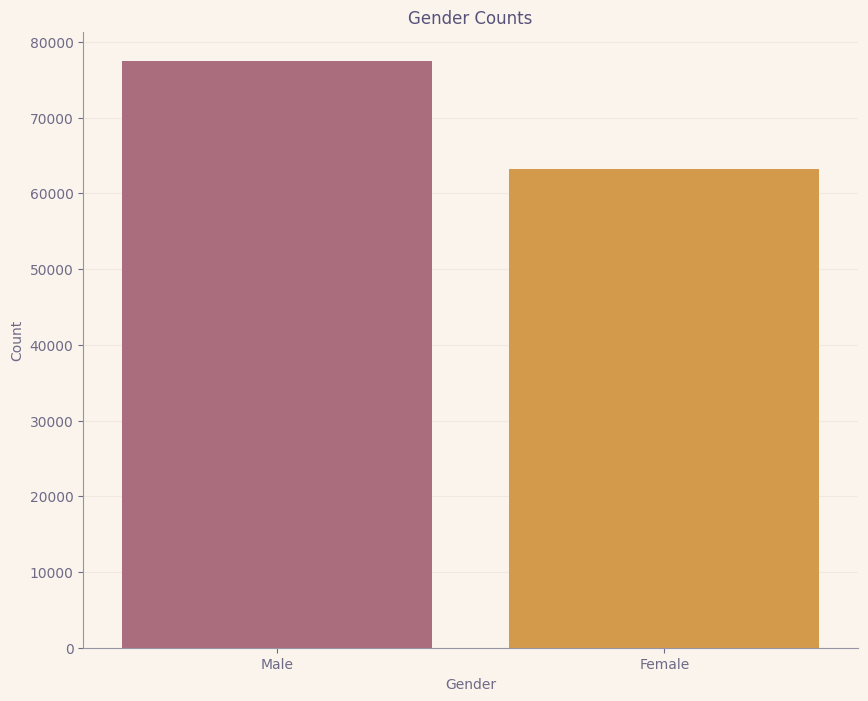

In [63]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Gender', y='Count', data=genter_count, hue='Gender')
plt.title('Gender Counts')
plt.show()


We notice city dosent has missing values will try to plot and see from each cites the people are to underastnd our data better.

In [33]:
train_df['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [53]:
#City Counts 🌆
# Create DataFrame of city counts
city_counts = train_df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Sort by count in descending order and display
print("Total unique cities:", len(city_counts))
city_counts.head()

Total unique cities: 98


,City,Count
0,Kalyan,6591
1,Patna,5924
2,Vasai-Virar,5765
3,Kolkata,5689
4,Ahmedabad,5613


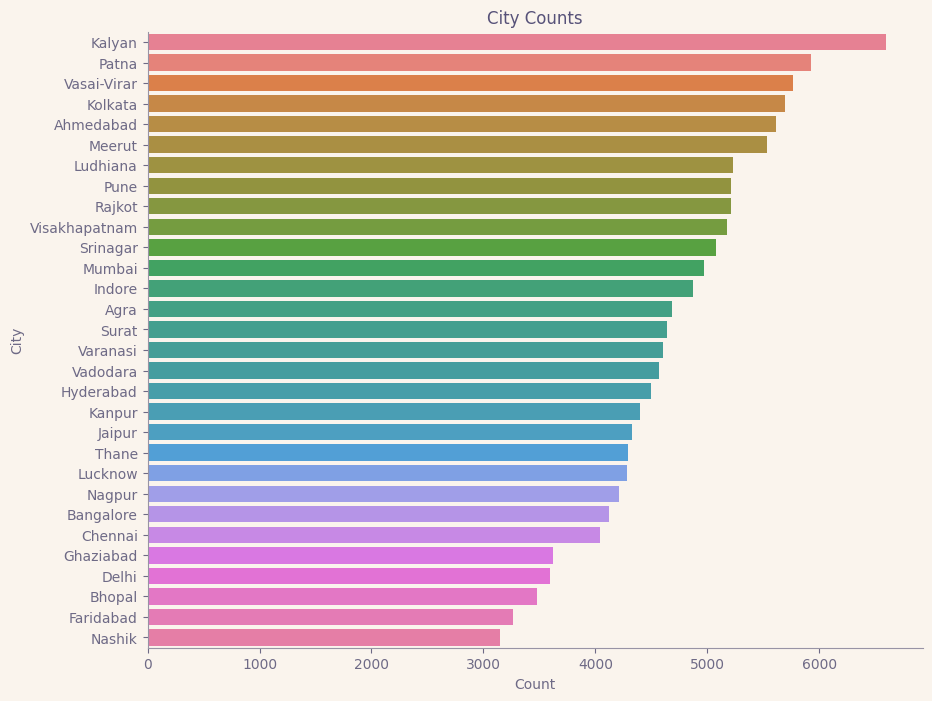

In [62]:
# Plot the city counts 
city_counts_plot = city_counts[city_counts['Count'] > 2000]
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='City', data=city_counts_plot, hue='City')
plt.title('City Counts')
plt.show()

Key Findings 🔑

- It seems that all the data is from India 🇮🇳
- We have more males than females
